In [1]:
import numpy  as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse

import matplotlib.pyplot as plt
%matplotlib inline

import json
import urllib

# titanic dataset
import seaborn as sns

# 비정형 데이터 처리를 위한 라이브러리
from bs4 import BeautifulSoup
import requests
import re



print('numpy  version - ' , np.__version__)
print('pandas version - ' , pd.__version__)

numpy  version -  1.20.3
pandas version -  1.3.4


In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.rcParams['font.family'] = 'AppleGothic'

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = '/Users/choijaewoo/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


In [3]:
iris_dataset = sns.load_dataset('iris')
titan_dataset = sns.load_dataset('titanic')
tips_dataset = sns.load_dataset('tips')
flights_dataset = sns.load_dataset('flights')

# 방법이 다르다.

In [4]:
titan_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


스타일 테마 적용 가능 - darkgrid, whitegrid, dark, white, ticks


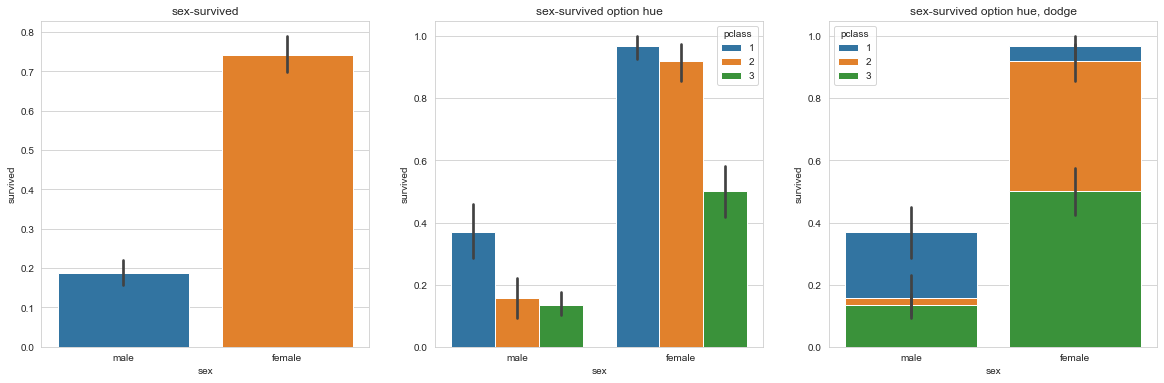

In [5]:
print('스타일 테마 적용 가능 - darkgrid, whitegrid, dark, white, ticks')
sns.set_style('whitegrid')

fig = plt.figure(figsize = (20,6))

ax01= fig.add_subplot(1,3,1)
ax02= fig.add_subplot(1,3,2)
ax03= fig.add_subplot(1,3,3)

# 위에는 도화지의 위치이다

ax01.set_title('sex-survived')
ax02.set_title('sex-survived option hue')
ax03.set_title('sex-survived option hue, dodge')

sns.barplot(ax = ax01, data = titan_dataset, x ='sex', y ='survived')
sns.barplot(ax = ax02, data = titan_dataset, x ='sex', y ='survived' , hue = 'pclass') # 클라스별로 기준을 나누어 준다
sns.barplot(ax = ax03, data = titan_dataset, x ='sex', y ='survived' , hue = 'pclass' , dodge = False) # 누적바가 된다. 하지만 평균을 구해서 누적하는 것은 아니다.


plt.show()
plt.close()

In [6]:
tips_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


요일별 전체 팁과 요일별 매출을 시각화 한다면 - 


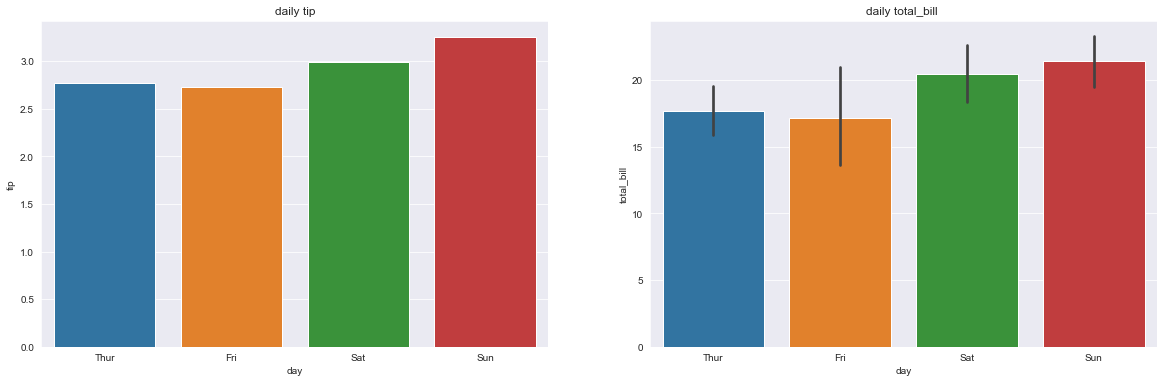

In [7]:
print('요일별 전체 팁과 요일별 매출을 시각화 한다면 - ')

sns.set_style('darkgrid')

fig = plt.figure(figsize = (20,6))

ax01= fig.add_subplot(1,2,1)
ax02= fig.add_subplot(1,2,2)

# 위에는 도화지의 위치이다

ax01.set_title('daily tip')
ax02.set_title('daily total_bill ')

# ci = False ci = sd
sns.barplot(ax = ax01, data = tips_dataset, x ='day', y ='tip', ci = False)
sns.barplot(ax = ax02, data = tips_dataset, x ='day', y ='total_bill') # 클라스별로 기준을 나누어 준다


plt.show()
plt.close()

스타일 테마 적용 가능 - darkgrid, whitegrid, dark, white, ticks


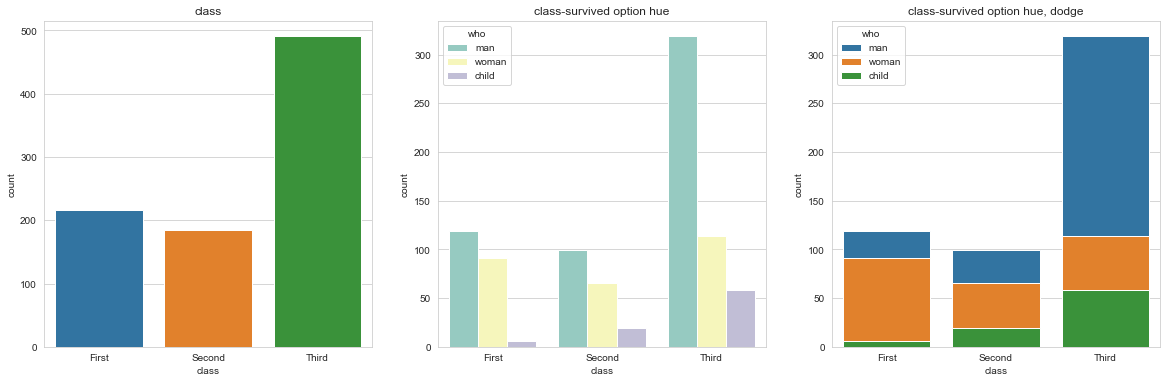

In [8]:
print('스타일 테마 적용 가능 - darkgrid, whitegrid, dark, white, ticks')
sns.set_style('whitegrid')

fig = plt.figure(figsize = (20,6))

ax01= fig.add_subplot(1,3,1)
ax02= fig.add_subplot(1,3,2)
ax03= fig.add_subplot(1,3,3)

# 위에는 도화지의 위치이다

ax01.set_title('class')
ax02.set_title('class-survived option hue')
ax03.set_title('class-survived option hue, dodge')

sns.countplot(ax = ax01, data = titan_dataset, x ='class')
sns.countplot(ax = ax02, data = titan_dataset, x ='class', hue = 'who' , palette = 'Set3') # 클라스별로 기준을 나누어 준다
sns.countplot(ax = ax03, data = titan_dataset, x ='class', hue = 'who' , dodge = False) # 누적바가 된다. 하지만 평균을 구해서 누적하는 것은 아니다.
# 빈도수를 확인할때는 count를 사용한다.

plt.show()
plt.close()

요일별로 팁을 준 빈도를 시각화 한다면 - 
요일별 전체 팁과 요일별 매출을 시각화 한다면 - 


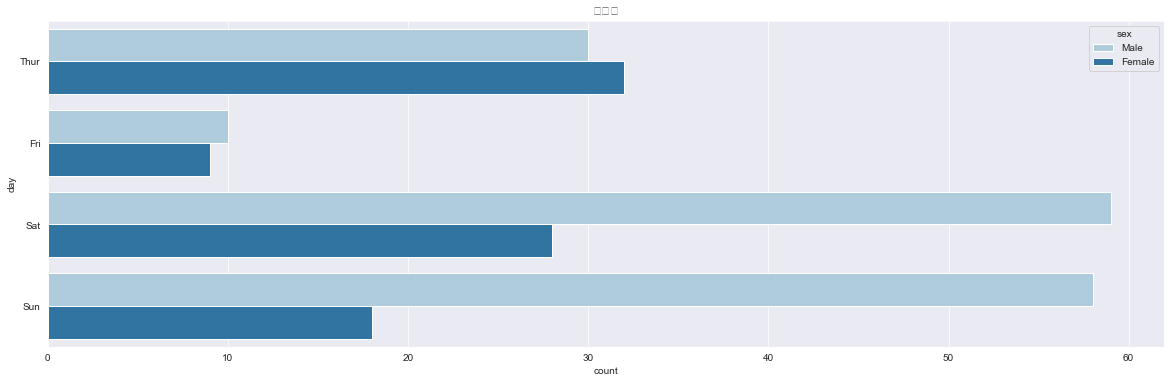

In [19]:
print('요일별로 팁을 준 빈도를 시각화 한다면 - ')
plt.rcParams['font.family'] = 'AppleGothic'

print('요일별 전체 팁과 요일별 매출을 시각화 한다면 - ')

sns.set_style('darkgrid')

fig = plt.figure(figsize = (20,6))
# sns.countplot(data=tips_dataset, x = 'day', hue = 'sex', palette = 'Set3') # 수직
sns.countplot(data=tips_dataset, y = 'day', hue = 'sex', palette = 'Paired') # 수평 y로 바꾸면 된다.

plt.title('요일별')

plt.show()
plt.close()

요일별로 팁을 준 빈도를 시각화 한다면 - 
요일별 매출을 시각화 한다면 - 


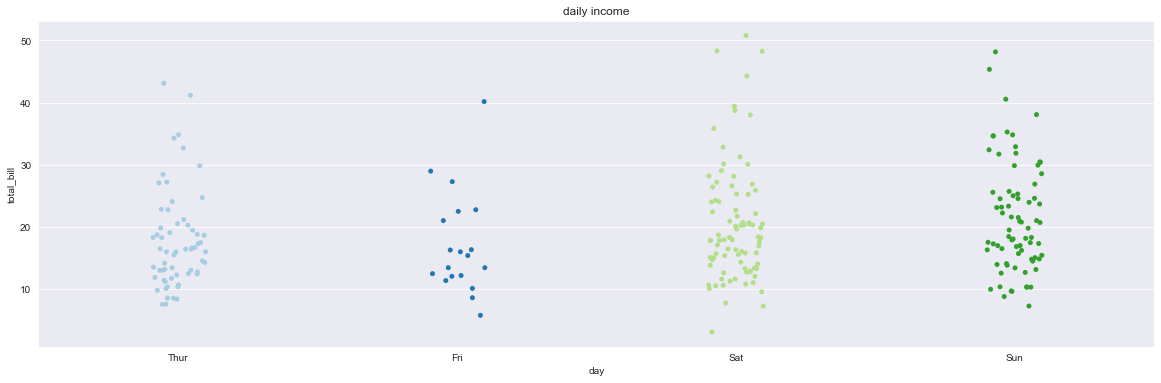

In [20]:
print('요일별로 팁을 준 빈도를 시각화 한다면 - ')

print('요일별 매출을 시각화 한다면 - ')

sns.set_style('darkgrid')

fig = plt.figure(figsize = (20,6))
# sns.countplot(data=tips_dataset, x = 'day', hue = 'sex', palette = 'Set3') # 수직
sns.stripplot(data=tips_dataset, x = 'day', y = 'total_bill', palette = 'Paired', jitter = True) # 수평 y로 바꾸면 된다.

plt.title('daily income')

plt.show()
plt.close()

요일별로 팁을 준 빈도를 시각화 한다면 - 
요일별 매출을 시각화 한다면 - 


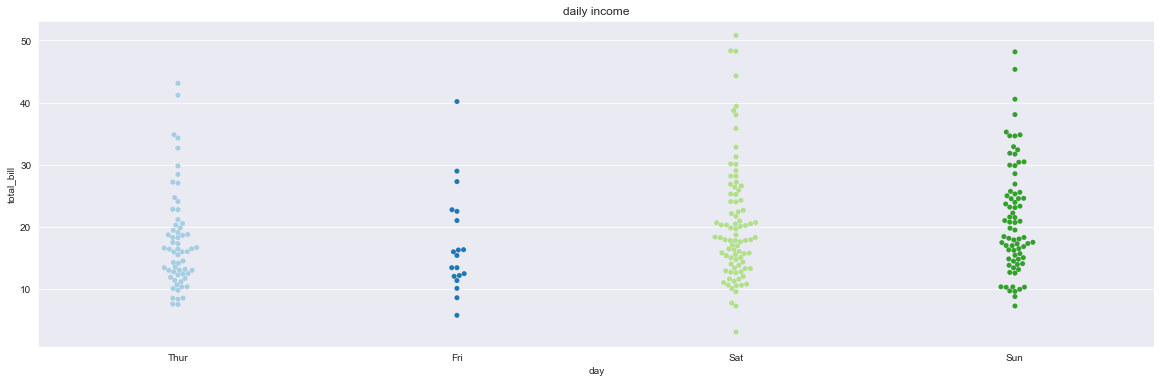

In [21]:
print('요일별로 팁을 준 빈도를 시각화 한다면 - ')
plt.rcParams['font.family'] = 'AppleGothic'

print('요일별 매출을 시각화 한다면 - ')

sns.set_style('darkgrid')

fig = plt.figure(figsize = (20,6))
# sns.countplot(data=tips_dataset, x = 'day', hue = 'sex', palette = 'Set3') # 수직
sns.swarmplot(data=tips_dataset, x = 'day', y = 'total_bill', palette = 'Paired') # 수평 y로 바꾸면 된다.

plt.title('daily income')

plt.show()
plt.close()

요일별 전체 팁과 요일별 매출을 시각화 한다면 - 


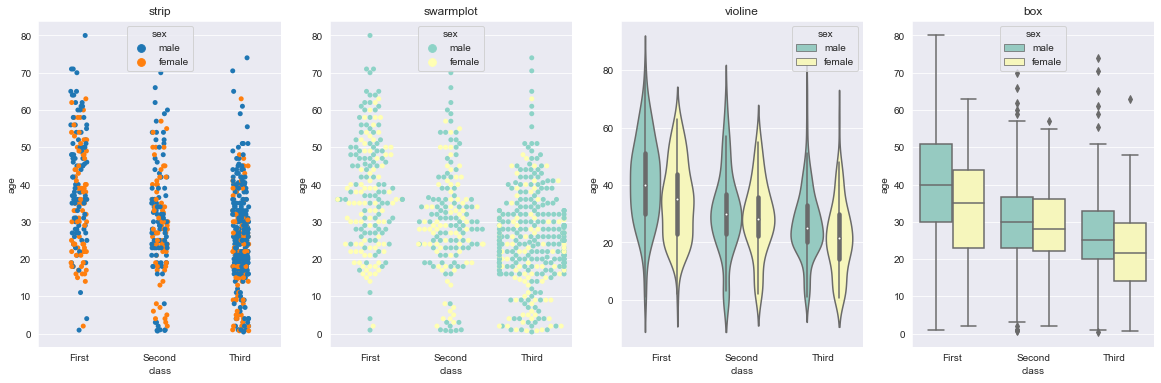

In [22]:
print('요일별 전체 팁과 요일별 매출을 시각화 한다면 - ')

sns.set_style('darkgrid')

fig = plt.figure(figsize = (20,6))

ax01= fig.add_subplot(1,4,1)
ax02= fig.add_subplot(1,4,2)
ax03= fig.add_subplot(1,4,3)
ax04= fig.add_subplot(1,4,4)


# 위에는 도화지의 위치이다

ax01.set_title('strip')
ax02.set_title('swarmplot')
ax03.set_title('violine')
ax04.set_title('box')

# ci = False ci = sd

sns.stripplot(ax = ax01, data = titan_dataset, x ='class', y ='age', hue = 'sex')
sns.swarmplot(ax = ax02, data = titan_dataset, x ='class', y ='age', palette = 'Set3', hue='sex') # 클라스별로 기준을 나누어 준다
sns.violinplot(ax = ax03, data = titan_dataset, x ='class', y ='age', palette = 'Set3', hue='sex') # 밀도르 보고자 할때
sns.boxplot(ax = ax04, data = titan_dataset, x ='class', y ='age', palette = 'Set3', hue='sex') # 밀도르 보고자 할때


plt.show()
plt.close()

In [23]:
titan_dataset.groupby(['sex','pclass'])['survived'].sum()
titan_dataset.groupby('sex')['class'].value_counts().unstack()

,Third,First,Second
sex,,,
female,144,94,76
male,347,122,108


In [24]:
table = titan_dataset.pivot_table(index = 'sex', columns = 'class', aggfunc = 'size')

table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


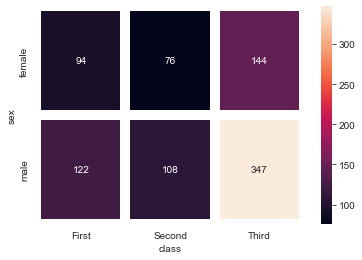

In [25]:
sns.heatmap(table,
            annot = True,
            fmt = 'd',
            linewidth = 10,
            cbar = True)

plt.show()
plt.close()

In [26]:
flights_dataset.set_index()

TypeError: set_index() missing 1 required positional argument: 'keys'

년도에 월별 승객수를 히트맵으로 시각화한다면 


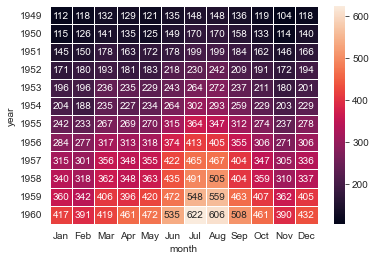

In [27]:
print('년도에 월별 승객수를 히트맵으로 시각화한다면 ')

table = flights_dataset.pivot(index ='year' , columns = 'month', values='passengers') # 이미 집계가 나왔다면 pivot_table 말고 pivot을 사용하자


sns.heatmap(table,
            annot = True,
            fmt = 'd',
            linewidth = 1,
            cbar = True)

plt.show()
plt.close()

In [28]:
titan_dataset.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


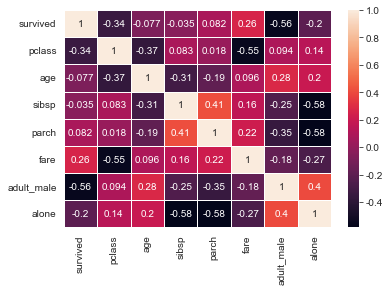

In [29]:
sns.heatmap(titan_dataset.corr(),
            annot = True,
            linewidth = 1,
            cbar = True)

plt.show()
plt.close()

In [30]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


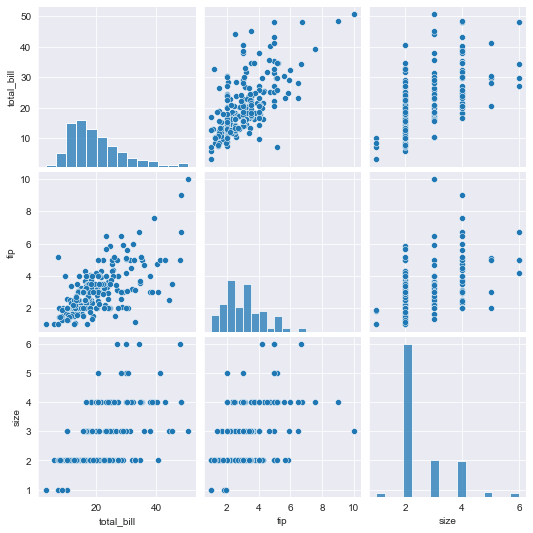

In [31]:
sns.pairplot(tips_dataset)

plt.show()
plt.close()

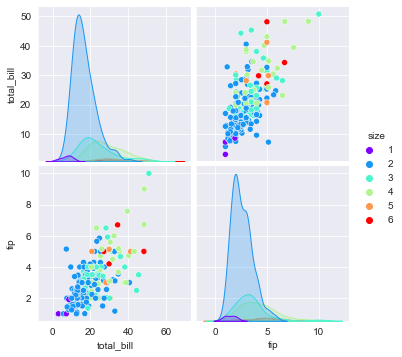

In [32]:
sns.pairplot(tips_dataset, hue = 'size', palette = 'rainbow')

plt.show()
plt.close()

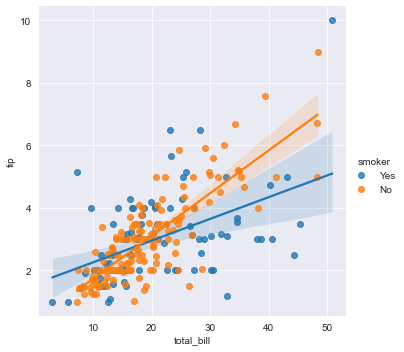

In [33]:
sns.lmplot(data = tips_dataset, x = 'total_bill', y = 'tip', hue = 'smoker')

plt.show()
plt.close()

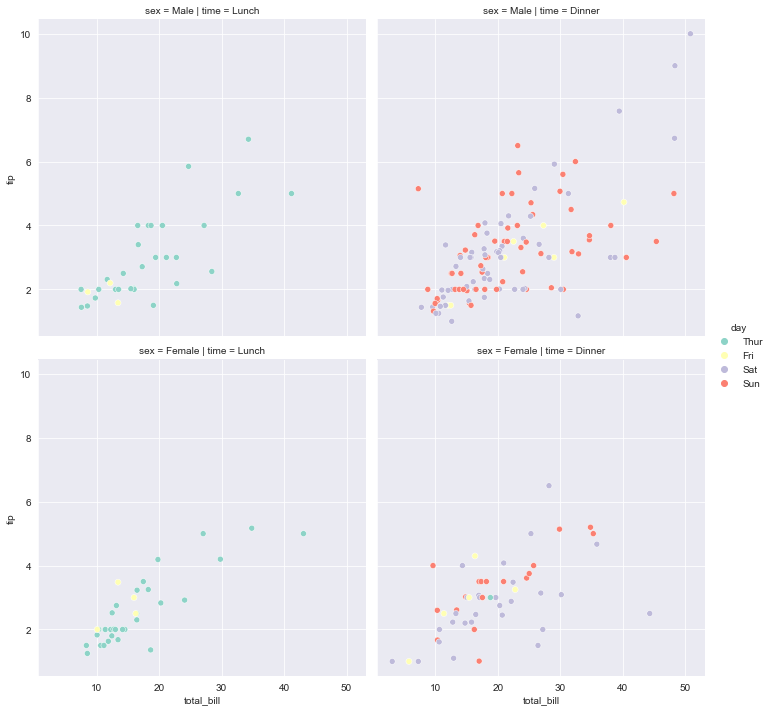

In [34]:
sns.relplot(data = tips_dataset, x = 'total_bill', y = 'tip',
            hue = 'day', col ='time', row ='sex', palette = 'Set3')
# hue는 그룹을 만들것이다. col,row 도 그룹을 만드는 옵션

plt.show()
plt.close()

In [3]:
import folium as g

In [4]:
map = g.Map(location = [37.5666805, 126.9784147], zoom_start = 12)
map.save('/Users/choijaewoo/visualization_data/map.html')

In [5]:
seoul_university = pd.read_excel('/Users/choijaewoo/visualization_data/서울지역 대학교 위치.xlsx')
seoul_university.set_index('Unnamed: 0', inplace = True)

In [6]:
map = g.Map(location = [37.5666805, 126.9784147], zoom_start = 12)


for name, lat, ing in zip(seoul_university.index, seoul_university['위도'], seoul_university['경도']) :
#     g.Marker([lat,ing], popup = name, icon = g.Icon(color = 'blue', icon='star')).add_to(map)
      g.CircleMarker([lat,ing],
                     popup = name,
                     icon = g.Icon(color = 'blue', icon='star'),
                     fill = True,
                     fill_color = 'yellow',
                     fill_opacity = .5,
                     radius = 15
                    ).add_to(map)

map




In [8]:
school_frm = pd.read_excel('/Users/choijaewoo/visualization_data/elem_school_folium.xlsx')
school_frm.head()

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,B000001838,서울휘경초등학교,초등학교,1959-10-10,공립,본교,운영,서울특별시 동대문구 휘경동 302-2,서울특별시 동대문구 망우로6길 48,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.585736,127.058122,2019-09-16,7001220,한국교원대학교
1,B000001839,서울동답초등학교,초등학교,1984-05-23,공립,본교,운영,서울특별시 동대문구 답십리동 2-24,서울특별시 동대문구 답십리로60길 12,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.571817,127.064205,2019-09-16,7001220,한국교원대학교
2,B000001840,서울답십리초등학교,초등학교,1962-11-29,공립,본교,운영,서울특별시 동대문구 답십리동 274,서울특별시 동대문구 전농로3길 23,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.569003,127.055423,2019-09-16,7001220,한국교원대학교
3,B000001841,서울신답초등학교,초등학교,1972-05-09,공립,본교,운영,서울특별시 동대문구 답십리동 463-13,서울특별시 동대문구 천호대로 177,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.573001,127.043399,2019-09-16,7001220,한국교원대학교
4,B000001842,서울용두초등학교,초등학교,1948-11-01,공립,본교,운영,서울특별시 동대문구 용두동 237-1,서울특별시 동대문구 천호대로13길 43,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.575743,127.028885,2019-09-16,7001220,한국교원대학교


In [9]:
print('Feature Selection - 학교명, 학교급구분, 소재지도로명, 위도,경도')

school_subset = school_frm.filter(['학교명','학교급구분','소재지도로명주소','위도','경도'])
school_subset

Feature Selection - 학교명, 학교급구분, 소재지도로명, 위도,경도


,학교명,학교급구분,소재지도로명주소,위도,경도
0,서울휘경초등학교,초등학교,서울특별시 동대문구 망우로6길 48,37.585736,127.058122
1,서울동답초등학교,초등학교,서울특별시 동대문구 답십리로60길 12,37.571817,127.064205
2,서울답십리초등학교,초등학교,서울특별시 동대문구 전농로3길 23,37.569003,127.055423
3,서울신답초등학교,초등학교,서울특별시 동대문구 천호대로 177,37.573001,127.043399
4,서울용두초등학교,초등학교,서울특별시 동대문구 천호대로13길 43,37.575743,127.028885
...,...,...,...,...,...
11868,평택새빛초등학교,초등학교,경기도 평택시 신촌2로 33(칠원동),37.024922,127.105114
11869,마장초등학교,초등학교,경기도 이천시 마장면 오천로 130,37.246497,127.358475
11870,인천중산초등학교,초등학교,인천광역시 중구 두미포로 100,37.494695,126.565599
11871,인천중산중학교,중학교,인천광역시 중구 두미포로 189,37.498222,126.571277


In [10]:
elemental_school = school_subset[(school_subset['소재지도로명주소'].str.contains('서울') == True) & (school_subset['학교급구분'].str.contains('초등학교') == True)]
elemental_school

condition = "소재지도로명주소.str.contains('서울특별시').values == True and 학교급구분 == '초등학교'"
school_subset = school_frm.query(condition)
school_subset

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,B000001838,서울휘경초등학교,초등학교,1959-10-10,공립,본교,운영,서울특별시 동대문구 휘경동 302-2,서울특별시 동대문구 망우로6길 48,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.585736,127.058122,2019-09-16,7001220,한국교원대학교
1,B000001839,서울동답초등학교,초등학교,1984-05-23,공립,본교,운영,서울특별시 동대문구 답십리동 2-24,서울특별시 동대문구 답십리로60길 12,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.571817,127.064205,2019-09-16,7001220,한국교원대학교
2,B000001840,서울답십리초등학교,초등학교,1962-11-29,공립,본교,운영,서울특별시 동대문구 답십리동 274,서울특별시 동대문구 전농로3길 23,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.569003,127.055423,2019-09-16,7001220,한국교원대학교
3,B000001841,서울신답초등학교,초등학교,1972-05-09,공립,본교,운영,서울특별시 동대문구 답십리동 463-13,서울특별시 동대문구 천호대로 177,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.573001,127.043399,2019-09-16,7001220,한국교원대학교
4,B000001842,서울용두초등학교,초등학교,1948-11-01,공립,본교,운영,서울특별시 동대문구 용두동 237-1,서울특별시 동대문구 천호대로13길 43,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.575743,127.028885,2019-09-16,7001220,한국교원대학교
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11684,B000025375,서울위례별초등학교,초등학교,2016-03-02,공립,본교,운영,서울특별시 송파구 장지동 886,서울특별시 송파구 위례광장로 243,7010000,서울특별시교육청,7071000,서울특별시강동송파교육지원청,2013-11-29,2019-09-10,37.479086,127.145042,2019-09-16,7001220,한국교원대학교
11702,B000025614,서울하늘숲초등학교,초등학교,2019-03-01,공립,본교,운영,서울특별시 구로구 천왕동 산13-1,서울특별시 구로구 오리로 1106,7010000,서울특별시교육청,7041000,서울특별시남부교육지원청,2013-11-29,2019-09-10,37.484688,126.842417,2019-09-16,7001220,한국교원대학교
11731,B000025891,서울언남초등학교,초등학교,1934-04-16,공립,본교,운영,서울특별시 서초구 내곡동 121,서울특별시 서초구 헌릉로8길 42,7010000,서울특별시교육청,7091000,서울특별시강남서초교육지원청,2013-11-29,2019-09-10,37.453919,127.061343,2019-09-16,7001220,한국교원대학교
11772,B000026183,서울항동초등학교,초등학교,2019-03-01,공립,본교,운영,서울특별시 구로구 항동 227,서울특별시 구로구 연동로 178,7010000,서울특별시교육청,7041000,서울특별시남부교육지원청,2013-11-29,2019-09-10,37.476731,126.823983,2019-09-16,7001220,한국교원대학교


In [11]:
elemental_school.isna().sum()

학교명         0
학교급구분       0
소재지도로명주소    0
위도          0
경도          0
dtype: int64

In [12]:
elemental_school.dropna(inplace = True)

In [13]:
elemental_school.isna().sum()

학교명         0
학교급구분       0
소재지도로명주소    0
위도          0
경도          0
dtype: int64

In [14]:
elemental_school

,학교명,학교급구분,소재지도로명주소,위도,경도
0,서울휘경초등학교,초등학교,서울특별시 동대문구 망우로6길 48,37.585736,127.058122
1,서울동답초등학교,초등학교,서울특별시 동대문구 답십리로60길 12,37.571817,127.064205
2,서울답십리초등학교,초등학교,서울특별시 동대문구 전농로3길 23,37.569003,127.055423
3,서울신답초등학교,초등학교,서울특별시 동대문구 천호대로 177,37.573001,127.043399
4,서울용두초등학교,초등학교,서울특별시 동대문구 천호대로13길 43,37.575743,127.028885
...,...,...,...,...,...
11684,서울위례별초등학교,초등학교,서울특별시 송파구 위례광장로 243,37.479086,127.145042
11702,서울하늘숲초등학교,초등학교,서울특별시 구로구 오리로 1106,37.484688,126.842417
11731,서울언남초등학교,초등학교,서울특별시 서초구 헌릉로8길 42,37.453919,127.061343
11772,서울항동초등학교,초등학교,서울특별시 구로구 연동로 178,37.476731,126.823983


In [15]:
map = g.Map(location = [37.5666805, 126.9784147], zoom_start = 12)


for idx in elemental_school.index :
#     g.Marker([lat,ing], popup = name, icon = g.Icon(color = 'blue', icon='star')).add_to(map)
      g.CircleMarker([elemental_school.loc[idx,'위도'], elemental_school.loc[idx,'경도']],
                     popup = elemental_school.loc[idx,'학교명'],
                     icon = g.Icon(color = 'blue', icon='star')
                    ).add_to(map)

map


In [16]:
pop_frm = pd.read_excel('/Users/choijaewoo/visualization_data/경기도인구데이터.xlsx')
pop_frm.set_index('구분', inplace= True)

In [17]:
pop_frm

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932
성남시중원구,263101,265137,259877,258093,254872,253883,256349,251982,250004,237909,230366
성남시분당구,434115,428858,460688,481027,488328,490735,495018,499087,501889,503830,500212
의정부시,421853,430849,431008,431801,430400,429147,430976,431112,433937,438457,441584
안양시만안구,265881,262820,262258,266261,263077,253492,250246,247315,247270,252353,254977


In [19]:
pop_frm.columns = pop_frm.columns.map(str)

In [20]:
geo_frm = json.load( open('/Users/choijaewoo/visualization_data/경기도행정구역경계.json', encoding='utf-8'))
geo_frm

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': 31380,
    'name': '양평군',
    'name_eng': 'Yangpyeong-gun',
    'base_year': 2013},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.56113535909492, 37.6256560539258],
      [127.57290963929243, 37.61087369350498],
      [127.56366973908277, 37.5842624297699],
      [127.52226606559191, 37.5828628697518],
      [127.50048767007603, 37.569036373178626],
      [127.47687473909174, 37.574448241913856],
      [127.47565866803647, 37.60512112601634],
      [127.44699730711024, 37.64497584741164],
      [127.4272349102434, 37.66284420898682],
      [127.40156700708162, 37.64806970784708],
      [127.3732642199939, 37.6453987554284],
      [127.3542931884407, 37.6250006376975],
      [127.34360057873045, 37.588997440929354],
      [127.31002843450217, 37.53523876142835],
      [127.30923294884336, 37.5135706079458],
      [127.32809611134748, 37.53133849534739],
      [127.3663244453597, 37.5

In [21]:
map = g.Map(location = [37.5666805, 126.9784147], zoom_start = 12)
g.Choropleth(geo_data = geo_frm,
            data = pop_frm['2017'],
             columns =[pop_frm.index, pop_frm['2017']],
             key_on = 'feature.properties.name'
            ).add_to(map)
map